# CyberSentinel: AI-Powered Autonomous Intrusion Detection System

## Final Year Major Project

CyberSentinel is an AI-driven Intrusion Detection System (IDS) developed as a Final Year Major Project. The system leverages Machine Learning and AutoML techniques to detect and classify malicious network traffic in real time.

This project focuses on building an intelligent cybersecurity monitoring platform capable of identifying various attack types using supervised machine learning algorithms and real-time analytics.

---

## 👨‍🎓 Project Team – Group G13

This project is developed by:

- **Piyush Jharariya** – Roll No: 48  
- **Rishabhraj Singh** – Roll No: 50  
- **Mohit Kurrewar** – Roll No: 40  

Group Number: **G13**

Academic Year: **2025–2026**

Degree: **Bachelor of Engineering**

---

## 🎯 Project Objective

The main objective of this project is to design and implement an intelligent AI-based Intrusion Detection System that can:

- Analyze network traffic data
- Classify traffic as Normal or Malicious
- Detect multiple attack categories
- Provide automated threat analysis
- Support real-time monitoring and visualization

---

## 🛡️ System Overview

CyberSentinel consists of the following major components:

1. **Data Preprocessing Module**
   - Dataset cleaning
   - Feature encoding
   - Label transformation

2. **Machine Learning Engine**
   - Random Forest Classifier
   - Extra Trees Classifier
   - Decision Tree Classifier
   - XGBoost
   - LightGBM
   - CatBoost

3. **Model Evaluation**
   - Accuracy Score
   - Precision
   - Recall
   - F1 Score
   - Confusion Matrix

4. **Deployment Module**
   - Model export using Joblib
   - API integration for prediction
   - Real-time classification support

---

## 📊 Dataset Used

The system uses benchmark intrusion detection datasets such as:

- CICIDS2017 (Sample Dataset)
- 5G-NIDD Dataset (Sample Dataset)

These datasets contain labeled network traffic records representing normal and various attack scenarios.

---

## 🧠 Machine Learning Approach

The following steps are performed:

1. Load and preprocess dataset
2. Encode categorical labels using LabelEncoder
3. Split dataset into training and testing sets
4. Train multiple ML models
5. Compare performance metrics
6. Select best-performing model
7. Export trained model for deployment

---

## 🏗️ Technologies Used

- Python
- Pandas
- NumPy
- Scikit-learn
- XGBoost
- LightGBM
- CatBoost
- Matplotlib
- Seaborn

---

## 🚀 Future Enhancements

- Integration with MERN Stack dashboard
- Real-time traffic simulation
- Automated alert generation
- Role-based authentication system
- Cloud deployment
- Autonomous threat response system

---

## 📌 Project Type

This project is developed strictly for academic purposes as part of the Final Year Major Project requirement.

---

## 📄 License

This project is developed for educational and academic use only.

---

## 📬 Contact

For academic inquiries:

**Piyush Jharariya**  
Final Year Engineering Student  
Group G13  
Academic Year 2025–2026

## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install numpy pandas seaborn matplotlib scikit-learn xgboost lightgbm catboost joblib --trusted-host pypi.org --trusted-host files.pythonhosted.org

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 8.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
import catboost as cb
import time

## Dataset 2: 5G-NIDD
The 5G-NIDD dataset is publicly available at: https://ieee-dataport.org/documents/5g-nidd-comprehensive-network-intrusion-detection-dataset-generated-over-5g-wireless

Due to the large size of this dataset and the file size limit of GitHub, the sampled subset of CICIDS2017 is used. The subsets are in the "Data" folder.  PS: The results might be different from the paper due to the size difference of the dataset.

The 5G-NIDD dataset, created in December 2022, is a fully labeled resource constructed on a functional 5G test network for researchers and practitioners evaluating AI/ML solutions in the context of 5G/6G security [87]. 5G-NIDD encompasses data extracted from a 5G testbed connected to the 5G Test Network (5GTN) at the University of Oulu, Finland. The dataset is derived from two base stations, each featuring an attacker node and multiple benign 5G users. The attacker nodes target a server deployed within the 5GTN MEC environment. The attack scenarios captured in the dataset primarily include DoS attacks and port scans.


### Load data

In [4]:
# Read the dataset
df = pd.read_csv('5G-NIDD_0.04.csv')

In [5]:
# print the class distribution of the last column
df['Label'].value_counts()

,count
Label,
0,19130
7,18351
1,5587
5,2848
4,856
6,790
8,647
3,386
2,41


### Data pre-processing

In [6]:
# Encode the dataset
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

# Identify and encode all categorical (object type) feature columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = labelencoder.fit_transform(df[column])

X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [7]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

## Machine learning model training

### Training six base learners (for comparison purposes):
decision tree, random forest, extra trees, XGBoost, LightGBM, and CatBoost


### Cross-validation

#### DT

Training time:  0.5044829845428467
Prediction time per sample:  0.00023349237285162272
Cross-Validation scores:  [0.99814958 0.9977639  0.99799522]
Mean of Cross-Validation scores:  0.9979695646136699
Accuracy of DT: 0.9982524671052632
Precision of DT: 0.9982591612412828
Recall of DT: 0.9982524671052632
F1-score of DT: 0.9982539498031
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       0.97      1.00      0.99        77
           4       1.00      0.99      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg 

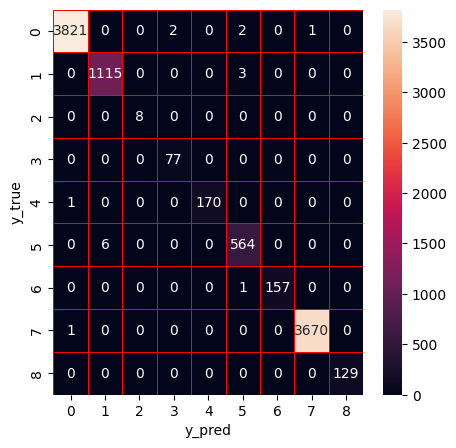

CPU times: user 2.1 s, sys: 35.9 ms, total: 2.13 s
Wall time: 2.23 s


In [8]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt


# Decision tree training and prediction with 3-fold cross-validation
dt = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
dt.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = dt.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test)*1000)

y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', dt_scores)
print('Mean of Cross-Validation scores: ', np.mean(dt_scores))

# Evaluation metrics
dt_score = dt.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of DT: ' + str(dt_score))
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### RF

Training time:  10.424562931060791
Prediction time:  0.008080791878072839 ms
Cross-Validation scores:  [0.99899769 0.99838075 0.99907472]
Mean of Cross-Validation scores:  0.9988177192359481
Accuracy of RF: 0.9989720394736842
Precision of RF: 0.9989728131708225
Recall of RF: 0.9989720394736842
F1-score of RF: 0.9989714785399005
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1

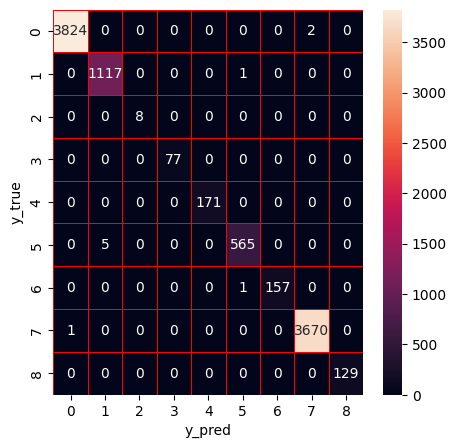

CPU times: user 26.6 s, sys: 77.7 ms, total: 26.6 s
Wall time: 39.2 s


In [9]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Random Forest training and prediction with 3-fold cross-validation
rf = RandomForestClassifier(random_state=0)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = rf.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(y_predict) * 1000, 'ms')

y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', rf_scores)
print('Mean of Cross-Validation scores: ', np.mean(rf_scores))

# Evaluation metrics
rf_score = rf.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of RF: ' + str(rf_score))
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### ET

Training time:  3.309619903564453
Prediction time:  0.01742227591182056 ms
Cross-Validation scores:  [0.99861218 0.99814943 0.99861207]
Mean of Cross-Validation scores:  0.9984578967234184
Accuracy of ET: 0.9986636513157895
Precision of ET: 0.9986700917269106
Recall of ET: 0.9986636513157895
F1-score of ET: 0.9986621979978082
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       0.99      1.00      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1.0

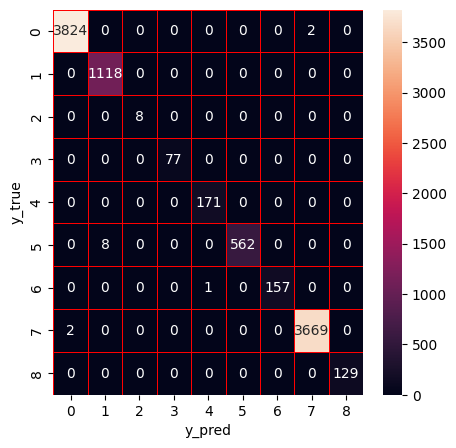

CPU times: user 9.91 s, sys: 33.3 ms, total: 9.94 s
Wall time: 10 s


In [10]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Extra Trees training and prediction with 3-fold cross-validation
et = ExtraTreesClassifier(random_state=0)
et_scores = cross_val_score(et, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
et.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = et.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(X_test) * 1000, 'ms')


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', et_scores)
print('Mean of Cross-Validation scores: ', np.mean(et_scores))

# Evaluation metrics
et_score = et.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of ET: ' + str(et_score))
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### XGBoost

Training time:  5.544163942337036
Prediction time per sample:  0.011144647080647318
Cross-Validation scores:  [0.99861218 0.99838075 0.9989205 ]
Mean of Cross-Validation scores:  0.998637812933869
Accuracy of XGBoost: 0.9988692434210527
Precision of XGBoost: 0.9988709051330813
Recall of XGBoost: 0.9988692434210527
F1-score of XGBoost: 0.998868363865329
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      

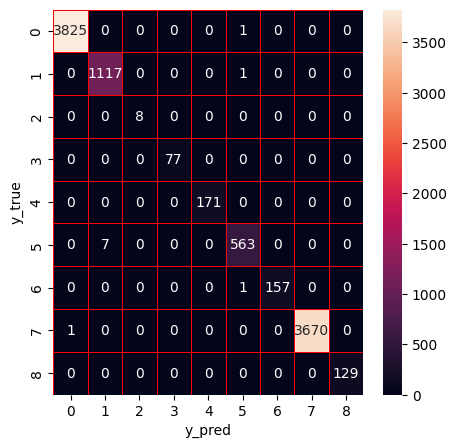

In [11]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# XGBoost training and prediction with 3-fold cross-validation
xg = xgb.XGBClassifier(random_state=0)
xg_scores = cross_val_score(xg, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
xg.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = xg.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', xg_scores)
print('Mean of Cross-Validation scores: ', np.mean(xg_scores))

# Evaluation metrics
xg_score = xg.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of XGBoost: ' + str(xg_score))
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6812
[LightGBM] [Info] Number of data points in the train set: 25938, number of used features: 46
[LightGBM] [Info] Start training from score -0.933125
[LightGBM] [Info] Start training from score -2.164121
[LightGBM] [Info] Start training from score -7.072422
[LightGBM] [Info] Start training from score -4.835588
[LightGBM] [Info] Start training from score -4.040972
[LightGBM] [Info] Start training from score -2.837657
[LightGBM] [Info] Start training from score -4.118459
[LightGBM] [Info] Start training from score -0.974654
[LightGBM] [Info] Start training from score -4.319920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

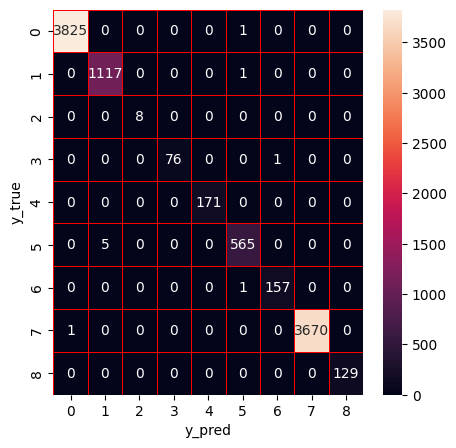

In [12]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# LightGBM training and prediction with 3-fold cross-validation
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm_scores = cross_val_score(lgbm, X_train, y_train, cv=3)

# calculate the training time
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = lgbm.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)



y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', lgbm_scores)
print('Mean of Cross-Validation scores: ', np.mean(lgbm_scores))

# Evaluation metrics
lgbm_score = lgbm.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of LightGBM: ' + str(lgbm_score))
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### Catboost

Training time:  126.09683322906494
Prediction time per sample:  0.007076875159614964
Cross-Validation scores:  [0.99892059 0.99838075 0.99876629]
Mean of Cross-Validation scores:  0.9986892096387291
Accuracy of CatBoost: 0.9984580592105263
Precision of CatBoost: 0.9984634333522431
Recall of CatBoost: 0.9984580592105263
F1-score of CatBoost: 0.9984568172129847
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       0.99      1.00      0.99        77
           4       1.00      0.99      1.00       171
           5       0.99      0.98      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       0.99      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.0

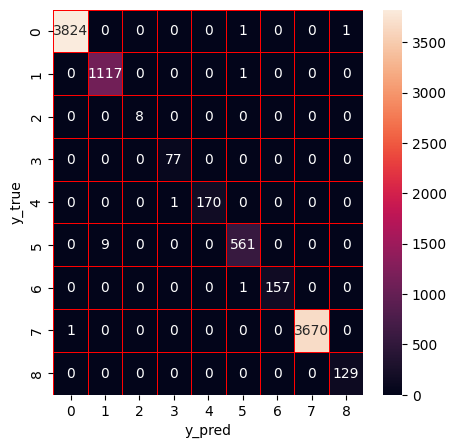

In [13]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# CatBoost training and prediction with 3-fold cross-validation
cat = CatBoostClassifier(random_state=0, verbose=False)
cat_scores = cross_val_score(cat, X_train, y_train, cv=3)


# calculate the training time
start = time.time()
cat.fit(X_train, y_train)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = cat.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)


# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', cat_scores)
print('Mean of Cross-Validation scores: ', np.mean(cat_scores))

# Evaluation metrics
cat_score = cat.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of CatBoost: ' + str(cat_score))
print('Precision of CatBoost: ' + str(precision))
print('Recall of CatBoost: ' + str(recall))
print('F1-score of CatBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [14]:
# record the results
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)
dt_prob_train=dt.predict_proba(X_train)
dt_prob_test=dt.predict_proba(X_test)

rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)
rf_prob_train=rf.predict_proba(X_train)
rf_prob_test=rf.predict_proba(X_test)

et_train=et.predict(X_train)
et_test=et.predict(X_test)
et_prob_train=et.predict_proba(X_train)
et_prob_test=et.predict_proba(X_test)

xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)
xg_prob_train=xg.predict_proba(X_train)
xg_prob_test=xg.predict_proba(X_test)

lgbm_train=lgbm.predict(X_train)
lgbm_test=lgbm.predict(X_test)
lgbm_prob_train=lgbm.predict_proba(X_train)
lgbm_prob_test=lgbm.predict_proba(X_test)

cat_train=cat.predict(X_train)
cat_test=cat.predict(X_test)
cat_prob_train=cat.predict_proba(X_train)
cat_prob_test=cat.predict_proba(X_test)


## Model selection

In [15]:
# Calculate the performance of each base model (e.g., accuracy)
base_model_performance = {
    'dt': np.mean(dt_scores),
    'rf': np.mean(rf_scores),
    'et': np.mean(et_scores),
    'xg': np.mean(xg_scores),
    'lgbm': np.mean(lgbm_scores),
    'cat': np.mean(cat_scores)

}

# Rank the base models based on their performance
ranked_models = sorted(base_model_performance, key=base_model_performance.get, reverse=True)

# Select the top-3 performing base models
top_3_models = ranked_models[:3]



In [16]:
top_3_models

['rf', 'cat', 'xg']

## Model Ensemble

In [17]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
lgbm_train=lgbm_train.reshape(-1, 1)
cat_train=cat_train.reshape(-1, 1)


dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)
lgbm_test=lgbm_test.reshape(-1, 1)
cat_test=cat_test.reshape(-1, 1)

Training time of Stacking: 1.8246371746063232
Testing time of Stacking: 0.005397332930251172
Accuracy of Stacking: 0.9983552631578947
Precision of Stacking: 0.9983736310436705
Recall of Stacking: 0.9983552631578947
F1-score of Stacking: 0.9983576267006297
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       0.89      1.00      0.94         8
           3       0.97      1.00      0.99        77
           4       1.00      0.99      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       0.98      1.00      0.99      9728
weighted avg       1.00      1.00      1.00      9728



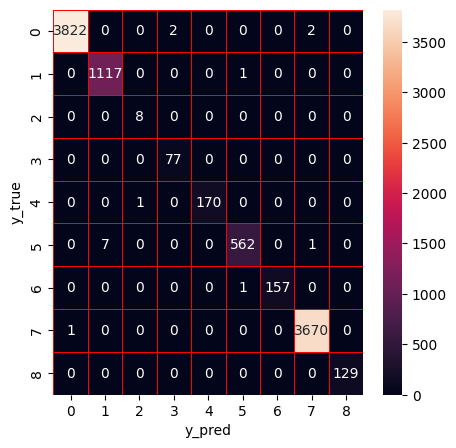

In [18]:
# Ensemble method 1: traditional stacking

# Get the predictions of the top-3 models
top_3_train_predictions = [globals()[model.lower() + '_train'] for model in top_3_models]
top_3_test_predictions = [globals()[model.lower() + '_test'] for model in top_3_models]

# Stack the predictions of the top-3 models
x_train = np.concatenate(top_3_train_predictions, axis=1)
x_test = np.concatenate(top_3_test_predictions, axis=1)

# Train and evaluate the stacking model
# calcualte the traning time
start_time = time.time()
#stk = lgb.LGBMClassifier().fit(x_train, y_train)
stk =  xgb.XGBClassifier(random_state=0).fit(x_train, y_train)
end_time = time.time()
stk_time = end_time - start_time
print('Training time of Stacking: '+ str(stk_time))

# calcualte the testing time per sample in milliseconds
start_time = time.time()
y_predict=stk.predict(x_test)
end_time = time.time()
stk_time = (end_time - start_time)/len(x_test)*1000
print('Testing time of Stacking: '+ str(stk_time))

y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Training time of Stacking: 2.53049373626709
Testing time of Stacking: 0.004943925887346268
Accuracy of Stacking: 0.9984580592105263
Precision of Stacking: 0.9985936475892142
Recall of Stacking: 0.9984580592105263
F1-score of Stacking: 0.9984963960032451
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       0.67      1.00      0.80         8
           3       1.00      1.00      1.00        77
           4       1.00      0.99      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       0.96      1.00      0.98      9728
weighted avg       1.00      1.00      1.00      9728



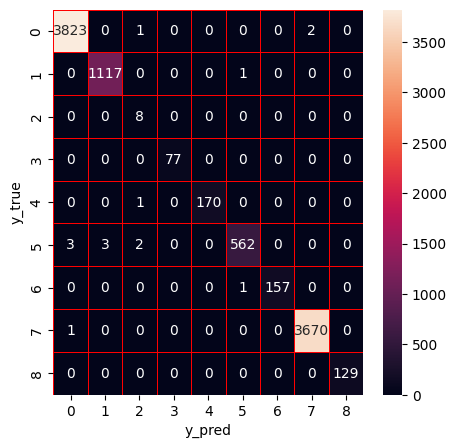

In [19]:
# Ensemble method 2: confidence-based stacking

# Get the prediction probabilities of the top-3 models
top_3_train_proba = [globals()[model.lower() + '_prob_train'] for model in top_3_models]
top_3_test_proba = [globals()[model.lower() + '_prob_test'] for model in top_3_models]

# Stack the predictions and prediction probabilities of the top-3 models
x_train = np.concatenate(top_3_train_proba, axis=1)
x_test = np.concatenate(top_3_test_proba, axis=1)

# Train and evaluate the stacking model
# calcualte the traning time
start_time = time.time()
#stk = lgb.LGBMClassifier().fit(x_train, y_train)
stk =  xgb.XGBClassifier(random_state=0).fit(x_train, y_train)
end_time = time.time()
stk_time = end_time - start_time
print('Training time of Stacking: '+ str(stk_time))

# calcualte the testing time per sample in milliseconds
start_time = time.time()
y_predict=stk.predict(x_test)
end_time = time.time()
stk_time = (end_time - start_time)/len(x_test)*1000
print('Testing time of Stacking: '+ str(stk_time))

y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Training time of Stacking: 2.506892681121826
Testing time of Stacking: 0.005016887658520749
Accuracy of Stacking: 0.9985608552631579
Precision of Stacking: 0.9986435731713816
Recall of Stacking: 0.9985608552631579
F1-score of Stacking: 0.9985824416265675
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       0.73      1.00      0.84         8
           3       1.00      1.00      1.00        77
           4       1.00      0.99      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       0.97      1.00      0.98      9728
weighted avg       1.00      1.00      1.00      9728



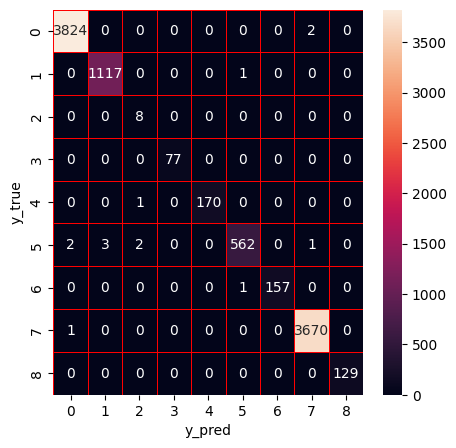

In [20]:
# Ensemble method 3: hybrid stacking

# Get the predictions and prediction probabilities of the top-3 models
top_3_train_predictions = [globals()[model.lower() + '_train'] for model in top_3_models]
top_3_test_predictions = [globals()[model.lower() + '_test'] for model in top_3_models]

top_3_train_proba = [globals()[model.lower() + '_prob_train'] for model in top_3_models]
top_3_test_proba = [globals()[model.lower() + '_prob_test'] for model in top_3_models]

# Combine the predictions and prediction probabilities of the top-3 models
x_train = np.concatenate(top_3_train_predictions + top_3_train_proba, axis=1)
x_test = np.concatenate(top_3_test_predictions + top_3_test_proba, axis=1)

# Train and evaluate the stacking model
# calcualte the traning time
start_time = time.time()
#stk = lgb.LGBMClassifier().fit(x_train, y_train)
stk =  xgb.XGBClassifier(random_state=0).fit(x_train, y_train)
end_time = time.time()
stk_time = end_time - start_time
print('Training time of Stacking: '+ str(stk_time))

# calcualte the testing time per sample in milliseconds
start_time = time.time()
y_predict=stk.predict(x_test)
end_time = time.time()
stk_time = (end_time - start_time)/len(x_test)*1000
print('Testing time of Stacking: '+ str(stk_time))

y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Automated Feature Selection

In [21]:
# Save the feature importance lists generated by base ML algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xg_feature = xg.feature_importances_
lgbm_feature = lgbm.feature_importances_
cat_feature = cat.feature_importances_

In [22]:
lgbm_feature = lgbm_feature/sum(lgbm_feature)
cat_feature = cat_feature/sum(cat_feature)

In [23]:
# Get the feature importances of the top-3 models
top_3_importances = [globals()[model.lower() + '_feature'] for model in top_3_models]

# Calculate the average importance of each feature
avg_feature = np.mean(top_3_importances, axis=0)

feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)


Features sorted by their score:
[(np.float64(0.1818), 'Seq'), (np.float64(0.1303), 'sMeanPktSz'), (np.float64(0.0962), 'sTtl'), (np.float64(0.0636), 'AckDat'), (np.float64(0.0615), 'State'), (np.float64(0.0587), 'Offset'), (np.float64(0.0464), 'SrcWin'), (np.float64(0.0429), 'TotBytes'), (np.float64(0.033), 'SrcTCPBase'), (np.float64(0.0328), 'dDSb'), (np.float64(0.0294), 'TcpRtt'), (np.float64(0.0247), 'sHops'), (np.float64(0.0247), 'SrcRate'), (np.float64(0.0198), 'SrcBytes'), (np.float64(0.0192), 'Proto'), (np.float64(0.0168), 'DstWin'), (np.float64(0.0155), 'SynAck'), (np.float64(0.0125), 'Cause'), (np.float64(0.0102), 'dTtl'), (np.float64(0.0078), 'Rate'), (np.float64(0.0074), 'dHops'), (np.float64(0.0062), 'dMeanPktSz'), (np.float64(0.0058), 'DstTCPBase'), (np.float64(0.0055), 'sVid'), (np.float64(0.0043), 'DstLoss'), (np.float64(0.0041), 'DstBytes'), (np.float64(0.004), 'Load'), (np.float64(0.0038), 'Sum'), (np.float64(0.0034), 'SrcPkts'), (np.float64(0.0032), 'Dur'), (np.float6

In [24]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break

In [25]:
# regenerate the training and test sets with the selected features

X_fs = df[fs].values
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [26]:
X_train.shape

(38908, 18)

In [27]:
# save the dataset with the selected features
df_fs = pd.DataFrame(X_fs, columns=fs)
df_fs['Label'] = y
df_fs.to_csv('5G-NIDD_0.04_fs.csv', index=False)

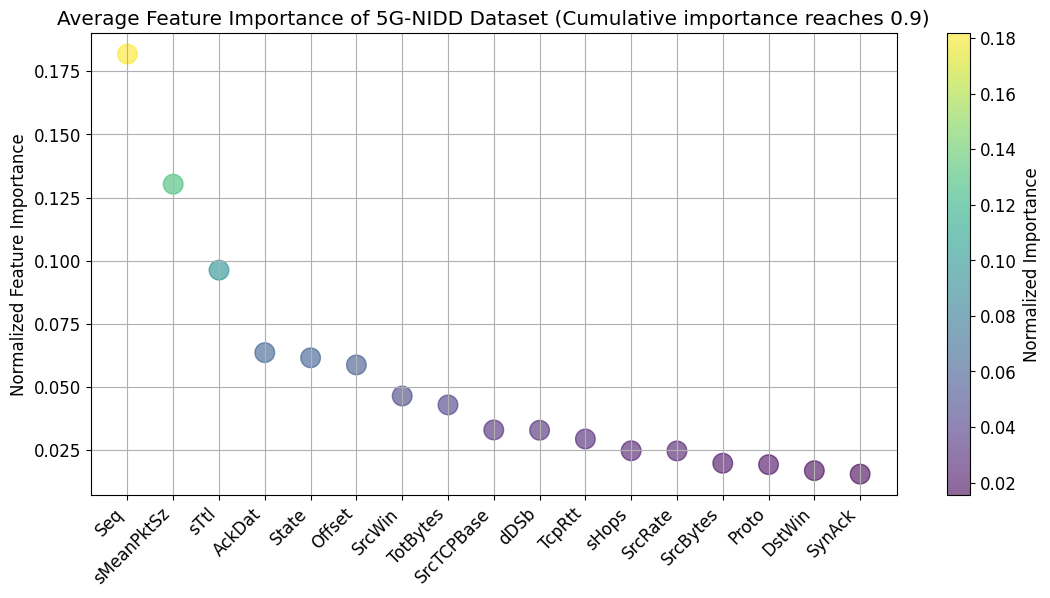

In [28]:
# Plot the feature importance of the top-3 models
plt.rcParams.update({'font.size': 12})

# Create a DataFrame for easier plotting
features = pd.DataFrame({
    'Feature': df.drop(['Label'],axis=1).columns,
    'Importance': avg_feature
})

# Sort features by importance
features = features.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance and filter features
features['Cumulative'] = features['Importance'].cumsum()
filtered_features = features[features['Cumulative'] <= 0.9]

# Plotting
plt.figure(figsize=(13, 6))
scatter = plt.scatter(x='Feature', y='Importance', s=200, c='Importance', cmap='viridis', alpha=0.6, data=filtered_features)
plt.colorbar(scatter, label='Normalized Importance')
plt.xticks(rotation=45, ha='right')
plt.title('Average Feature Importance of 5G-NIDD Dataset (Cumulative importance reaches 0.9)')
plt.ylabel('Normalized Feature Importance')
plt.grid(True)
plt.show()

### Data Balancing by Proposed TVAE-based Method

In [29]:
pd.Series(y_train).value_counts()

,count
0,15304
7,14680
1,4469
5,2278
4,685
6,632
8,518
3,309
2,33


In [33]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.5/201.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.8 MB/s eta 0:00:00


In [64]:
from sdv.metadata import SingleTableMetadata
import pandas as pd

# Load the feature-selected data to infer initial dtypes and column names
df_fs_temp = pd.read_csv('5G-NIDD_0.04_fs.csv')

# Initialize metadata structure
column_metadata = {}
for col in df_fs_temp.columns:
    if col == 'Label':
        column_metadata[col] = {'sdtype': 'categorical'} # Label is categorical
    # Explicitly handle known categorical columns that are integer-encoded
    elif col in ['State', 'Proto', 'Cause']:
        column_metadata[col] = {'sdtype': 'categorical', 'subtype': 'integer'}
    elif df_fs_temp[col].dtype == 'int64':
        column_metadata[col] = {'sdtype': 'numerical', 'subtype': 'integer'}
    elif df_fs_temp[col].dtype == 'float64':
        column_metadata[col] = {'sdtype': 'numerical', 'subtype': 'float'}
    else:
        # Fallback for any other unexpected types (should ideally not happen after initial encoding)
        column_metadata[col] = {'sdtype': 'categorical'}

# Create the metadata object and assign the column metadata
metadata = SingleTableMetadata()
metadata.columns = column_metadata

# The variable `fs` (feature selected columns) is from previous steps and used here for context if needed,
# but the metadata construction is now based directly on the df_fs_temp dtypes and explicit handling of 'Label'.


In [65]:
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 0,stratify = df['Label'])
X_train = training_set[fs]
y_train = training_set.iloc[:, -1]
X_test = test_set[fs]
y_test = test_set.iloc[:, -1]

In [66]:
training_set['Label'].value_counts()

,count
Label,
0,15304
7,14680
1,4469
5,2278
4,685
6,632
8,518
3,309
2,33


In [67]:
from sdv.single_table import TVAESynthesizer
# Identify the average number of samples per class
average_samples = y_train.value_counts().mean()

# Identify minority classes with less than half the average number of samples
minority_classes = y_train.value_counts()
minority_classes = minority_classes[minority_classes < average_samples / 2].index.tolist()

# Prepare an empty DataFrame to collect synthetic data
synthetic_data = pd.DataFrame()

In [69]:
# Generating synthetic samples for each minority class using TVAE
for cls in minority_classes:
    cls_samples_features = X_train[y_train == cls]
    num_samples_needed = int(average_samples - len(cls_samples_features))

    # Combine features and labels for fitting the TVAE, as metadata includes the 'Label' column
    cls_samples_for_tvae_fit = cls_samples_features.assign(Label=y_train[y_train == cls])

    # Re-initialize metadata object for each iteration to avoid modification issues
    # or ensure it's defined correctly outside the loop if shared.
    # Let's ensure the metadata is correctly formatted based on sdv's expectations.
    updated_column_metadata = {}
    # These are the columns that were originally categorical and then label-encoded
    original_categorical_cols = ['State', 'Proto', 'Cause']
    for col in cls_samples_for_tvae_fit.columns:
        if col == 'Label' or col in original_categorical_cols:
            updated_column_metadata[col] = {'sdtype': 'categorical'}
        else:
            # For truly numerical columns, just specify 'numerical' sdtype
            updated_column_metadata[col] = {'sdtype': 'numerical'}

    metadata = SingleTableMetadata()
    metadata.columns = updated_column_metadata

    # Initialize the TVAE model with the correctly prepared metadata object
    tvaegan = TVAESynthesizer(metadata=metadata)

    # Fit the TVAE model on the minority class samples including their labels
    tvaegan.fit(cls_samples_for_tvae_fit)

    # Generate synthetic instances
    new_samples = tvaegan.sample(num_samples_needed)

    # Append the new synthetic instances to the synthetic data list
    synthetic_data = pd.concat([synthetic_data, new_samples], ignore_index=True)


In [70]:
# Concatenate the original and synthetic data to form a balanced dataset
balanced_data = pd.concat([X_train.assign(Label=y_train), synthetic_data], ignore_index=True)

# Display the new distribution of labels in the balanced dataset
print(balanced_data['Label'].value_counts())

# Prepare the balanced dataset for model training
X_train_balanced = balanced_data.drop(['Label'], axis=1)
y_train_balanced = balanced_data['Label']

Label
0    15304
7    14680
1     4469
3     4323
8     4323
4     4323
6     4323
2     4323
5     2278
Name: count, dtype: int64


## Machine learning model training

### Training six base learners:
decision tree, random forest, extra trees, XGBoost, LightGBM, and CatBoost


### Cross-validation

### DT

Training time:  0.37606143951416016
Prediction time per sample:  0.00029726346072397734
Cross-Validation scores:  [0.99629801 0.9984575  0.9986631 ]
Mean of Cross-Validation scores:  0.9978062053422044
Accuracy of DT: 0.9983552631578947
Precision of DT: 0.9983709446408638
Recall of DT: 0.9983552631578947
F1-score of DT: 0.998358229666928
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       0.98      1.00      0.99       129

    accuracy                           1.00      9728
   macro avg       0.98      1.00      0.99      9728
weighted a

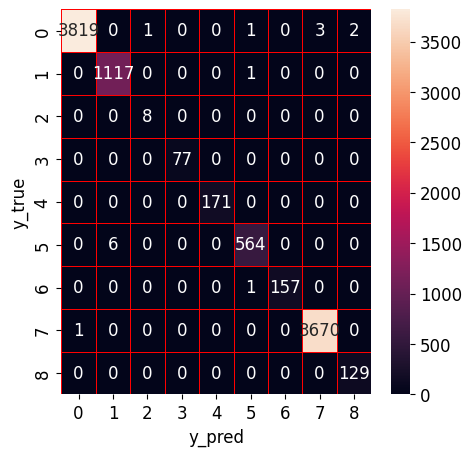

CPU times: user 1.55 s, sys: 5.09 ms, total: 1.55 s
Wall time: 1.56 s


In [71]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt


# Decision tree training and prediction with 3-fold cross-validation
dt = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dt, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
dt.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = dt.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test)*1000)

y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', dt_scores)
print('Mean of Cross-Validation scores: ', np.mean(dt_scores))

# Evaluation metrics
dt_score = dt.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of DT: ' + str(dt_score))
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 20/20 [00:19<00:00,  1.00trial/s, best loss: -0.9977547896981983]
Decision Tree: Hyperopt estimated optimum {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 11}
Accuracy of DT: 0.9986636513157895
Precision of DT: 0.9986800197323371
Recall of DT: 0.9986636513157895
F1-score of DT: 0.9986654117036999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       0.89      1.00      0.94         8
           3       0.99      1.00      0.99        77
           4       1.00      0.99      1.00       171
           5       1.00      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       0.99      1.00      0.99      9728

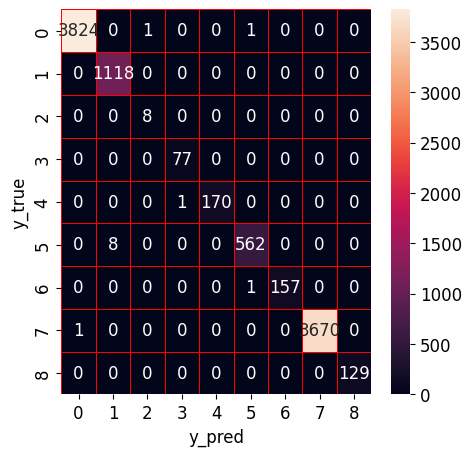

In [72]:
# Hyperparameter Optimization using BO-TPE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': ['gini', 'entropy'][int(params['criterion'])]
    }
    clf = DecisionTreeClassifier(random_state=0, **params)
    score = cross_val_score(clf, X_train_balanced, y_train_balanced, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 1, 50, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
    'criterion': hp.choice('criterion', [0, 1])  # 0 for 'gini', 1 for 'entropy'
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['max_depth'] = int(best['max_depth'])
best['min_samples_split'] = int(best['min_samples_split'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['criterion'] = ['gini', 'entropy'][int(best['criterion'])]

print("Decision Tree: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
dt = DecisionTreeClassifier(random_state=0, **best)
dt.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = dt.predict(X_test)
y_true = y_test

# Evaluation metrics
dt_score = dt.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of DT: ' + str(dt_score))
print('Precision of DT: ' + str(precision))
print('Recall of DT: ' + str(recall))
print('F1-score of DT: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### RF

Training time:  8.181993961334229
Prediction time:  0.007614713946455403 ms
Cross-Validation scores:  [0.99727492 0.99912592 0.99938297]
Mean of Cross-Validation scores:  0.9985946044007399
Accuracy of RF: 0.9990748355263158
Precision of RF: 0.9990753884449644
Recall of RF: 0.9990748355263158
F1-score of RF: 0.9990748233356164
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1.

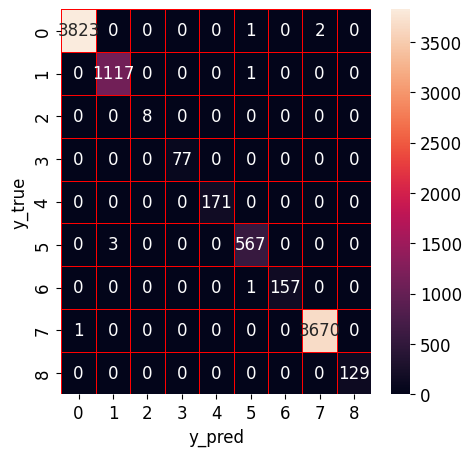

CPU times: user 24.1 s, sys: 24.3 ms, total: 24.1 s
Wall time: 24.3 s


In [73]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Random Forest training and prediction with 3-fold cross-validation
rf = RandomForestClassifier(random_state=0)
rf_scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
rf.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = rf.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(y_predict) * 1000, 'ms')

y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', rf_scores)
print('Mean of Cross-Validation scores: ', np.mean(rf_scores))

# Evaluation metrics
rf_score = rf.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of RF: ' + str(rf_score))
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 20/20 [15:55<00:00, 47.77s/trial, best loss: -0.9986117441237621]
Random Forest: Hyperopt estimated optimum {'criterion': 'entropy', 'max_depth': 26, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 178}
Accuracy of RF: 0.9988692434210527
Precision of RF: 0.9988699921444715
Recall of RF: 0.9988692434210527
F1-score of RF: 0.9988688755514655
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro av

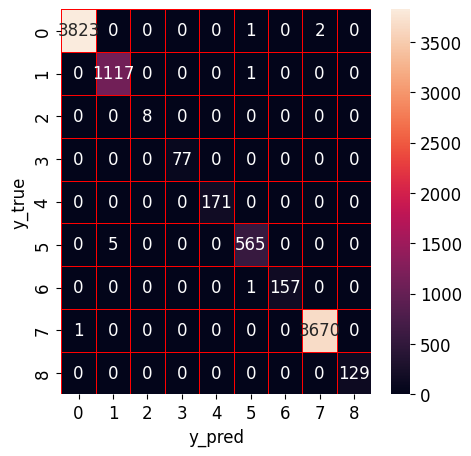

In [74]:
# Hyperparameter Optimization using BO-TPE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': ['gini', 'entropy'][int(params['criterion'])]
    }
    clf = RandomForestClassifier(random_state=0, **params)
    score = cross_val_score(clf, X_train_balanced, y_train_balanced, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 40, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    'criterion': hp.choice('criterion', [0, 1])  # 0 for 'gini', 1 for 'entropy'
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['max_features'] = int(best['max_features'])
best['min_samples_split'] = int(best['min_samples_split'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['criterion'] = ['gini', 'entropy'][int(best['criterion'])]

print("Random Forest: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
rf = RandomForestClassifier(random_state=0, **best)
rf.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = rf.predict(X_test)
y_true = y_test

# Evaluation metrics
rf_score = rf.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of RF: ' + str(rf_score))
print('Precision of RF: ' + str(precision))
print('Recall of RF: ' + str(recall))
print('F1-score of RF: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### ET

Training time:  2.1910159587860107
Prediction time:  0.011734076236423693 ms
Cross-Validation scores:  [0.99825184 0.99912592 0.99928013]
Mean of Cross-Validation scores:  0.9988859629480803
Accuracy of ET: 0.999280427631579
Precision of ET: 0.9992809200908287
Recall of ET: 0.999280427631579
F1-score of ET: 0.9992801105889306
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       1.00      0.99      1.00       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      9728
weighted avg       1.0

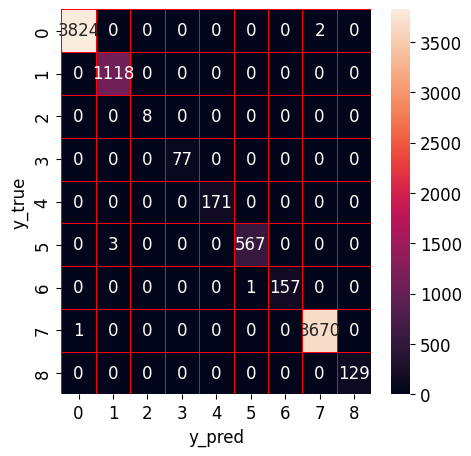

CPU times: user 8.64 s, sys: 13 ms, total: 8.65 s
Wall time: 8.74 s


In [75]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Extra Trees training and prediction with 3-fold cross-validation
et = ExtraTreesClassifier(random_state=0)
et_scores = cross_val_score(et, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
et.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = et.predict(X_test)
end = time.time()
print('Prediction time: ', (end - start) / len(X_test) * 1000, 'ms')


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', et_scores)
print('Mean of Cross-Validation scores: ', np.mean(et_scores))

# Evaluation metrics
et_score = et.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of ET: ' + str(et_score))
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 20/20 [02:31<00:00,  7.60s/trial, best loss: -0.9991430490994962]
Extra Trees: Hyperopt estimated optimum {'criterion': 'entropy', 'max_depth': 25, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 87}
Accuracy of ET: 0.999280427631579
Precision of ET: 0.999281214654385
Recall of ET: 0.999280427631579
F1-score of ET: 0.9992803654107764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       0.99      1.00      1.00       171
           5       1.00      0.99      1.00       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg    

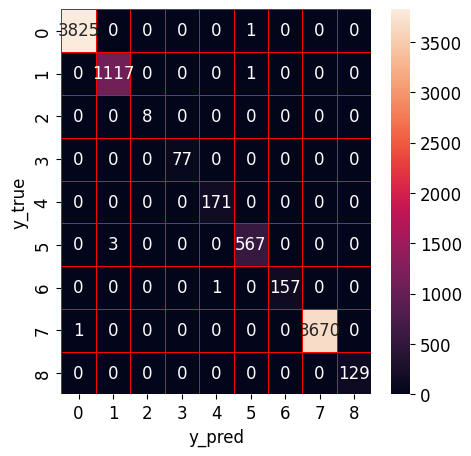

In [76]:
# Hyperparameter Optimization using BO-TPE

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'criterion': ['gini', 'entropy'][int(params['criterion'])]
    }
    clf = ExtraTreesClassifier(random_state=0, **params)
    score = cross_val_score(clf, X_train_balanced, y_train_balanced, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 1, 50, 1),
    'max_features': hp.quniform('max_features', 1, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
    'criterion': hp.choice('criterion', [0, 1])  # 0 for 'gini', 1 for 'entropy'
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['max_features'] = int(best['max_features'])
best['min_samples_split'] = int(best['min_samples_split'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['criterion'] = ['gini', 'entropy'][int(best['criterion'])]

print("Extra Trees: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
et = ExtraTreesClassifier(random_state=0, **best)
et.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = et.predict(X_test)
y_true = y_test

# Evaluation metrics
et_score = et.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of ET: ' + str(et_score))
print('Precision of ET: ' + str(precision))
print('Recall of ET: ' + str(recall))
print('F1-score of ET: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### XGBoost

Training time:  4.099262475967407
Prediction time per sample:  0.011004605575611717
Cross-Validation scores:  [0.99331585 0.99892025 0.99917729]
Mean of Cross-Validation scores:  0.9971377993263286
Accuracy of XGBoost: 0.9988692434210527
Precision of XGBoost: 0.998870514824584
Recall of XGBoost: 0.9988692434210527
F1-score of XGBoost: 0.9988689525290511
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00     

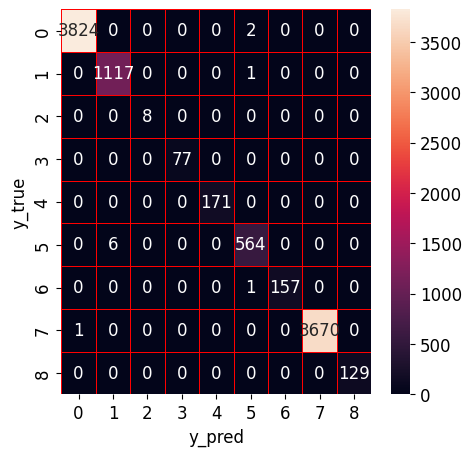

In [77]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# XGBoost training and prediction with 3-fold cross-validation
xg = xgb.XGBClassifier(random_state=0)
xg_scores = cross_val_score(xg, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
xg.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = xg.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)


y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', xg_scores)
print('Mean of Cross-Validation scores: ', np.mean(xg_scores))

# Evaluation metrics
xg_score = xg.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of XGBoost: ' + str(xg_score))
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 20/20 [01:00<00:00,  3.00s/trial, best loss: -0.9991776315789473]
XGBoost: Hyperopt estimated optimum {'learning_rate': 1.4854574339452389, 'max_depth': 14, 'n_estimators': 40}
Accuracy of XGBoost: 0.9991776315789473
Precision of XGBoost: 0.999178875509754
Recall of XGBoost: 0.9991776315789473
F1-score of XGBoost: 0.9991779403093913
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       1.00      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00      972

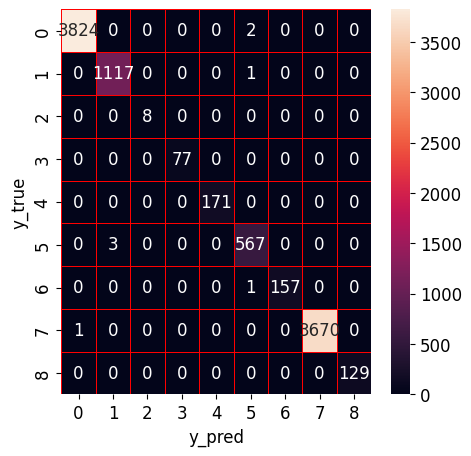

In [78]:
# Hyperparameter Optimization using BO-TPE

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': abs(float(params['learning_rate']))
    }
    clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0, **params)
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9)
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['learning_rate'] = abs(float(best['learning_rate']))

print("XGBoost: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
xg = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0, **best)
xg.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = xg.predict(X_test)
y_true = y_test

# Evaluation metrics
xg_score = xg.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of XGBoost: ' + str(xg_score))
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3839
[LightGBM] [Info] Number of data points in the train set: 38897, number of used features: 18
[LightGBM] [Info] Start training from score -1.338333
[LightGBM] [Info] Start training from score -2.569329
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Info] Start training from score -3.242865
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Info] Start training from score -1.379862
[LightGBM] [Info] Start training from score -2.602433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

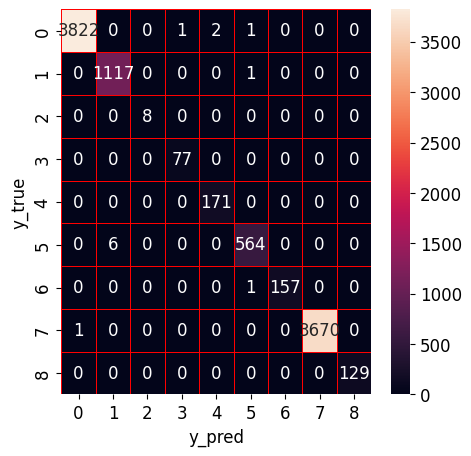

In [79]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# LightGBM training and prediction with 3-fold cross-validation
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm_scores = cross_val_score(lgbm, X_train_balanced, y_train_balanced, cv=3)

# calculate the training time
start = time.time()
lgbm.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = lgbm.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)



y_true = y_test

# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', lgbm_scores)
print('Mean of Cross-Validation scores: ', np.mean(lgbm_scores))

# Evaluation metrics
lgbm_score = lgbm.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of LightGBM: ' + str(lgbm_score))
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

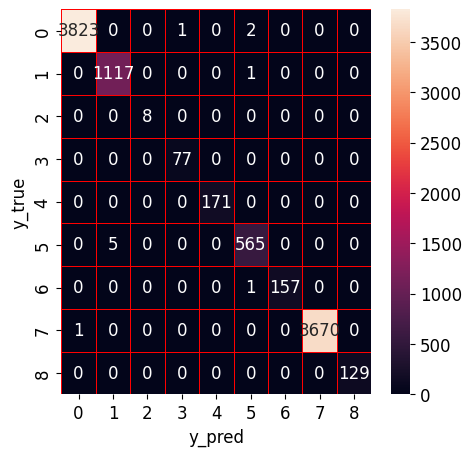

In [80]:
# Hyperparameter Optimization using BO-TPE

import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': abs(float(params['learning_rate'])),
        'num_leaves': int(params['num_leaves']),
        'min_child_samples': int(params['min_child_samples'])
    }
    clf = lgb.LGBMClassifier(random_state=0, **params)
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
    'num_leaves': hp.quniform('num_leaves', 10, 200, 5),
    'min_child_samples': hp.quniform('min_child_samples', 5, 100, 5)
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

# Convert the returned hyperparameters to their original types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['learning_rate'] = abs(float(best['learning_rate']))
best['num_leaves'] = int(best['num_leaves'])
best['min_child_samples'] = int(best['min_child_samples'])

print("LightGBM: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
lgbm = lgb.LGBMClassifier(random_state=0, **best)
lgbm.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = lgbm.predict(X_test)
y_true = y_test

# Evaluation metrics
lgbm_score = lgbm.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of LightGBM: ' + str(lgbm_score))
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


### CatBoost

Training time:  180.10686802864075
Prediction time per sample:  0.014158603000013452
Cross-Validation scores:  [0.99814901 0.99897167 0.99938297]
Mean of Cross-Validation scores:  0.9988345481853389
Accuracy of CatBoost: 0.998766447368421
Precision of CatBoost: 0.9987682895345804
Recall of CatBoost: 0.998766447368421
F1-score of CatBoost: 0.998766272728777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        77
           4       0.99      1.00      1.00       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       1.00      1.00      1.00  

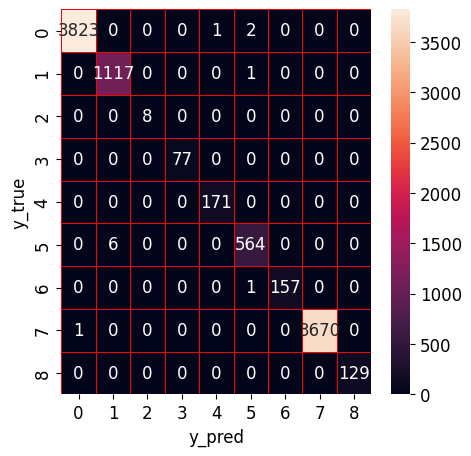

In [81]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# CatBoost training and prediction with 3-fold cross-validation
cat = CatBoostClassifier(random_state=0, verbose=False)
cat_scores = cross_val_score(cat, X_train_balanced, y_train_balanced, cv=3)


# calculate the training time
start = time.time()
cat.fit(X_train_balanced, y_train_balanced)
end = time.time()
print('Training time: ', end - start)

# calculate the prediction time per sample in milliseconds
start = time.time()
y_predict = cat.predict(X_test)
end = time.time()
print('Prediction time per sample: ', (end - start) / len(X_test) * 1000)


# Print out the cross-validation scores and mean of them
print('Cross-Validation scores: ', cat_scores)
print('Mean of Cross-Validation scores: ', np.mean(cat_scores))

# Evaluation metrics
cat_score = cat.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of CatBoost: ' + str(cat_score))
print('Precision of CatBoost: ' + str(precision))
print('Recall of CatBoost: ' + str(recall))
print('F1-score of CatBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


100%|██████████| 2/2 [04:05<00:00, 122.94s/trial, best loss: -0.9986636513157895]
CatBoost: Hyperopt estimated optimum {'depth': 7, 'iterations': 500, 'learning_rate': np.float64(0.47083808759799906)}
Accuracy of CatBoost: 0.9986636513157895
Precision of CatBoost: 0.9986784836468942
Recall of CatBoost: 0.9986636513157895
F1-score of CatBoost: 0.9986665836193026
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3826
           1       0.99      1.00      1.00      1118
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        77
           4       0.99      1.00      0.99       171
           5       0.99      0.99      0.99       570
           6       1.00      0.99      1.00       158
           7       1.00      1.00      1.00      3671
           8       1.00      1.00      1.00       129

    accuracy                           1.00      9728
   macro avg       0.99      1.00      0

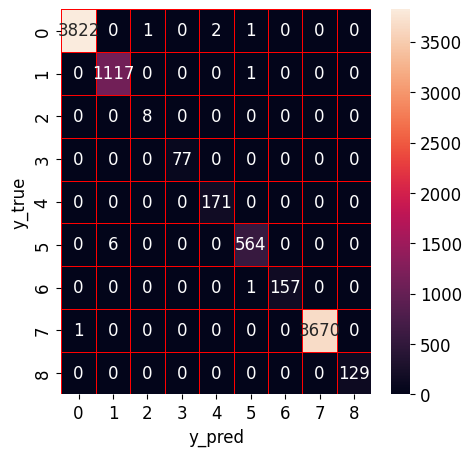

In [82]:
# Hyperparameter Optimization using BO-TPE

import catboost as cb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the objective function
def objective(params):
    params = {
        'depth': int(params['depth']),
        'learning_rate': params['learning_rate'],
        'iterations': int(params['iterations'])
    }
    clf = cb.CatBoostClassifier(random_state=0, verbose=False, **params)
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss': -score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'depth': hp.quniform('depth', 2, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'iterations': hp.quniform('iterations', 100, 1000, 100)
}

# Run the optimizer
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=2)

# Convert the returned hyperparameters to their original types
best['depth'] = int(best['depth'])
best['learning_rate'] = best['learning_rate']
best['iterations'] = int(best['iterations'])

print("CatBoost: Hyperopt estimated optimum {}".format(best))

# Use the best parameters to train the model
cat = cb.CatBoostClassifier(random_state=0, verbose=False, **best)
cat.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_predict = cat.predict(X_test)
y_true = y_test

# Evaluation metrics
cat_score = cat.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')

# Print results
print('Accuracy of CatBoost: ' + str(cat_score))
print('Precision of CatBoost: ' + str(precision))
print('Recall of CatBoost: ' + str(recall))
print('F1-score of CatBoost: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [83]:
# record the results
dt_train=dt.predict(X_train_balanced)
dt_test=dt.predict(X_test)
dt_prob_train=dt.predict_proba(X_train_balanced)
dt_prob_test=dt.predict_proba(X_test)

rf_train=rf.predict(X_train_balanced)
rf_test=rf.predict(X_test)
rf_prob_train=rf.predict_proba(X_train_balanced)
rf_prob_test=rf.predict_proba(X_test)

et_train=et.predict(X_train_balanced)
et_test=et.predict(X_test)
et_prob_train=et.predict_proba(X_train_balanced)
et_prob_test=et.predict_proba(X_test)

xg_train=xg.predict(X_train_balanced)
xg_test=xg.predict(X_test)
xg_prob_train=xg.predict_proba(X_train_balanced)
xg_prob_test=xg.predict_proba(X_test)

lgbm_train=lgbm.predict(X_train_balanced)
lgbm_test=lgbm.predict(X_test)
lgbm_prob_train=lgbm.predict_proba(X_train_balanced)
lgbm_prob_test=lgbm.predict_proba(X_test)

cat_train=cat.predict(X_train_balanced)
cat_test=cat.predict(X_test)
cat_prob_train=cat.predict_proba(X_train_balanced)
cat_prob_test=cat.predict_proba(X_test)


## Model selection

In [84]:
# Calculate the performance of each base model (e.g., accuracy)
base_model_performance = {
    'dt': np.mean(dt_scores),
    'rf': np.mean(rf_scores),
    'et': np.mean(et_scores),
    'xg': np.mean(xg_scores),
    'lgbm': np.mean(lgbm_scores),
    'cat': np.mean(cat_scores)

}

# Rank the base models based on their performance
ranked_models = sorted(base_model_performance, key=base_model_performance.get, reverse=True)

# Select the top-3 performing base models
top_3_models = ranked_models[:3]



In [85]:
top_3_models

['et', 'cat', 'rf']

In [86]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
lgbm_train=lgbm_train.reshape(-1, 1)
cat_train=cat_train.reshape(-1, 1)


dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)
lgbm_test=lgbm_test.reshape(-1, 1)
cat_test=cat_test.reshape(-1, 1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 58346, number of used features: 3
[LightGBM] [Info] Start training from score -1.338277
[LightGBM] [Info] Start training from score -2.569226
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -3.243093
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -1.379905
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

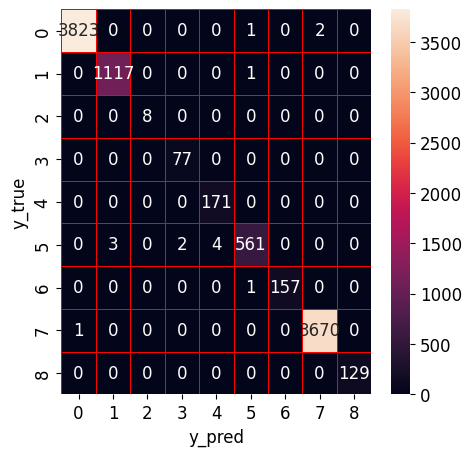

In [87]:
# Ensemble method 1: traditional stacking

# Get the predictions of the top-3 models
top_3_train_predictions = [globals()[model.lower() + '_train'] for model in top_3_models]
top_3_test_predictions = [globals()[model.lower() + '_test'] for model in top_3_models]

# Stack the predictions of the top-3 models
X_train_balanced = np.concatenate(top_3_train_predictions, axis=1)
x_test = np.concatenate(top_3_test_predictions, axis=1)

# Train and evaluate the stacking model
stk = lgb.LGBMClassifier().fit(X_train_balanced, y_train_balanced)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3361
[LightGBM] [Info] Number of data points in the train set: 58346, number of used features: 27
[LightGBM] [Info] Start training from score -1.338277
[LightGBM] [Info] Start training from score -2.569226
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -3.243093
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -1.379905
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

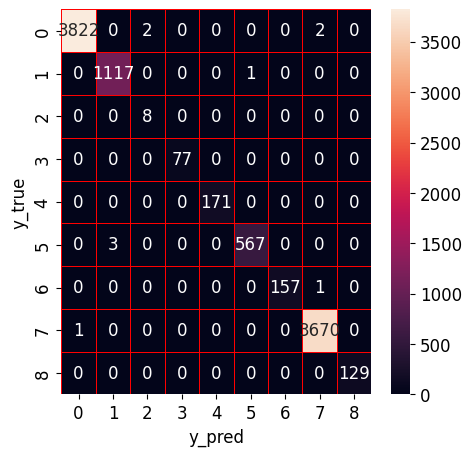

In [88]:
# Ensemble method 2: confidence-based stacking

# Get the prediction probabilities of the top-3 models
top_3_train_proba = [globals()[model.lower() + '_prob_train'] for model in top_3_models]
top_3_test_proba = [globals()[model.lower() + '_prob_test'] for model in top_3_models]

# Stack the predictions and prediction probabilities of the top-3 models
X_train_balanced = np.concatenate(top_3_train_proba, axis=1)
x_test = np.concatenate(top_3_test_proba, axis=1)

# Train and evaluate the stacking model
stk = lgb.LGBMClassifier().fit(X_train_balanced, y_train_balanced)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3388
[LightGBM] [Info] Number of data points in the train set: 58346, number of used features: 30
[LightGBM] [Info] Start training from score -1.338277
[LightGBM] [Info] Start training from score -2.569226
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -3.243093
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Info] Start training from score -1.379905
[LightGBM] [Info] Start training from score -2.602441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

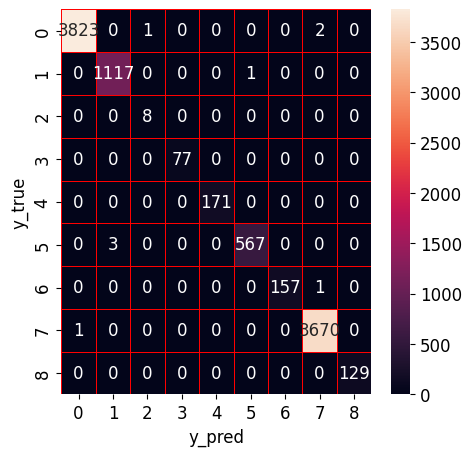

In [89]:
# Ensemble method 3: hybrid stacking
# Get the predictions and prediction probabilities of the top-3 models
top_3_train_predictions = [globals()[model.lower() + '_train'] for model in top_3_models]
top_3_test_predictions = [globals()[model.lower() + '_test'] for model in top_3_models]

top_3_train_proba = [globals()[model.lower() + '_prob_train'] for model in top_3_models]
top_3_test_proba = [globals()[model.lower() + '_prob_test'] for model in top_3_models]

# Combine the predictions and prediction probabilities of the top-3 models
X_train_balanced = np.concatenate(top_3_train_predictions + top_3_train_proba, axis=1)
x_test = np.concatenate(top_3_test_predictions + top_3_test_proba, axis=1)

# Train and evaluate the stacking model
stk = lgb.LGBMClassifier().fit(X_train_balanced, y_train_balanced)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# PS: the hyperparameter optimization process is the same as the previous steps

In [90]:
import joblib

joblib.dump(stk, "model2.pkl")
print("Model saved successfully")

Model saved successfully
